In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
print("Current launch location: ", os.getcwd())

Current launch location:  d:\ing3\Compression-video\TVID-Project\src


In [29]:
filename = "../data/elementary/YUV_encoded/522.pgm"

with open(filename, "rb") as f:
    # read the header
    header = f.readline()
    assert header == b"P5\n"

    # read the size
    size = f.readline()
    width, height = [int(x) for x in size.split()]

    # read the max value
    maxval = f.readline()
    assert maxval == b"255\n"

    # read the data
    data = f.read()

    # convert the data to a numpy array
    img = np.frombuffer(data, dtype=np.uint8)
    img = img.reshape((height, width))

(518400,)


In [42]:
def read_yuv_pgm(file_path, width, height):
    # Calculate the size of Y, U, and V components
    y_size = width * height
    uv_size = width * height // 2

    # Read the entire YUV file into a NumPy array
    yuv_data = np.fromfile(file_path, dtype=np.uint8).reshape(width)

    # Separate Y, U, and V components
    y_component = yuv_data[:y_size].reshape((height, width))
    u_component = yuv_data[y_size:]

    return y_component, u_component, v_component

YUV_img = read_yuv_pgm(filename, 720, 576)

ValueError: cannot reshape array of size 103695 into shape (288,360)

(720, 720)


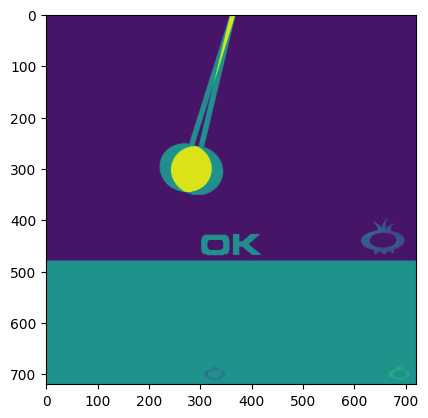

In [26]:
# Display the YUV image
img = plt.imread(filename)
print(img.shape)
plt.imshow(img)

In [24]:
def convertYUVtoRGB(yuv):
    # convert the image to RGB
    rgb = np.zeros((height, width, 3), dtype=np.uint8)
    rgb[:,:,0] = yuv[:,:,0] + 1.402 * (yuv[:,:,2] - 128)
    rgb[:,:,1] = yuv[:,:,0] - 0.344 * (yuv[:,:,1] - 128) - 0.714 * (yuv[:,:,2] - 128)
    rgb[:,:,2] = yuv[:,:,0] + 1.772 * (yuv[:,:,1] - 128)
    return rgb

# Display the RGB image
plt.figure()
plt.imshow(convertYUVtoRGB(img))

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 640x480 with 0 Axes>